<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting air pollution level in an area in Eindhoven in the upcoming week.

We're going to take the following approach:
1. Problem definition
2. Data
3. Features
4. Data Exploration & Visualization
5. Data Preparation
6. Modelling

<h2><font color=slateblue> 1. Problem Definition </font></h2>

In a statement,
> Given historical pollution data, weather data and people going through an area, can we predict air pollution level in an area in Eindhoven in the upcoming week?

<h2><font color=slateblue> 2. Data </font></h2>

The data is provided by TNO and Zicht op Data.

<h2><font color=slateblue> 3. Features </font></h2>

This is where you'll get different information about each of the features in our data.

We have three separate datasets for the period between 25-09-2021 and 30-12-2021:

**Air pollution**
* date: date in ymd_hms
* PC4: postcode
* pm2.5: particulate matter <2.5um in ug/m3
* pm10: particulate matter <10um in ug/m3
* no2: nitrogen dioxide in ug/m3
* no: nitrogen oxide in ug/m3
* so2: sulphur dioxide in ug/m3


**Meteo**
* date: date in ymd_hms
* PC4: postcode
* wd: wind direction in degrees 0-360
* ws: wind speed in m/s
* blh: boundary layer height in metres
* tcc: total cloud cover in oktas (0-9)
* ssrd: solar surface radiation downwards in W/m2 

(see https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview for more information)

**Zichtop**
* PC4: postcode
* date: date in ymd_hms
* pop_tot: total number of people in PC4 for each time step
* m00_30: number of people who have been there for up to 30 minutes
* m30_60: number of people who have been there for 30 and 60 minutes
* H1_2: number of people who have been there for 1 and 2 hours
* H2_4: number of people who have been there for 2 and 4 hours
* H4_8: number of people who have been there for 4 and 8 hours
* H8_16: number of people who have been there for 8 and 16 hours
* H16plus: number of people who have been there for over 16 hours

<h2><font color=slateblue> 4. Data Exploration & Visualization </font></h2>

<h4>Explore the meteo data<h4>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_meteo = pd.read_csv("data/meteo.csv")
df_air_pollution = pd.read_csv("data/air_pollution.csv")
df_meteo.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
102692,2021-09-21 20:00:00,5625,129.836838,1.783231,44.355858,0.989143,0.000000
156189,2021-10-30 21:00:00,5632,226.105286,3.847166,490.275879,0.977687,0.000000
219361,2021-01-16 01:00:00,5651,219.481293,1.848559,86.516899,0.915612,0.000000
234289,2021-09-30 01:00:00,5652,202.654831,4.584419,456.274963,0.690645,0.000000
36938,2021-03-21 02:00:00,5615,186.438904,3.433606,389.322632,1.000000,0.000000
149654,2021-01-31 14:00:00,5632,354.085907,4.076417,518.443970,0.958710,255.412465
203110,2021-03-09 22:00:00,5645,171.374191,1.235240,71.582481,0.734338,0.000000
233620,2021-09-02 04:00:00,5652,41.818985,1.456634,122.065254,0.736564,0.000000
117935,2021-06-18 23:00:00,5627,241.495087,3.895456,718.245422,0.182045,0.000000
12851,2021-06-20 11:00:00,5612,216.339722,4.477719,1454.418213,0.555966,735.995764


In [3]:
df_air_pollution.sample(10)

,date,PC4,pm10,pm2.5,no2,no,so2
74917,2021-12-28 12:00:00,5641,10.900770,10.859280,10.061638,0.900214,1.284552
41279,2021-11-08 23:00:00,5651,35.208092,25.637857,49.526024,32.402665,13.681732
62945,2021-12-13 16:00:00,5629,18.506210,27.568000,24.908684,0.815876,2.590969
24961,2021-10-30 01:00:00,5629,6.353324,4.601760,9.750996,6.379641,0.530441
48206,2021-11-29 14:00:00,5655,10.609304,4.965916,29.102672,19.040578,1.257089
7858,2021-11-23 10:00:00,5615,35.628361,25.595207,48.731415,31.882787,11.422806
60875,2021-12-10 10:00:00,5654,16.189910,26.520710,22.005861,2.736864,3.632335
21810,2021-11-01 18:00:00,5627,7.477976,4.354654,28.738261,18.802160,2.331230
47188,2021-10-18 04:00:00,5655,15.805472,10.830160,19.085128,12.486546,2.936300
3585,2021-10-10 09:00:00,5613,37.699455,29.072395,32.189202,21.059956,0.121070


In [4]:
df_meteo['PC4'].unique()

array([5611, 5612, 5613, 5614, 5615, 5616, 5617, 5621, 5622, 5623, 5624,
       5625, 5626, 5627, 5628, 5629, 5631, 5632, 5633, 5641, 5642, 5643,
       5644, 5645, 5646, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658],
      dtype=int64)

In [5]:
df_meteo.shape

(289080, 7)

In [6]:
df_meteo['date'] = pd.to_datetime(df_meteo['date'])
df_air_pollution['date'] = pd.to_datetime(df_air_pollution['date'])
df_meteo.dtypes

date    datetime64[ns]
PC4              int64
wd             float64
ws             float64
blh            float64
tcc            float64
ssrd           float64
dtype: object

In [7]:
postalcode = df_meteo[df_meteo['PC4'] == 5611]
postalcode.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
1365,2021-02-26 21:00:00,5611,122.569214,2.231889,196.659836,0.004556,0.000000
7584,2021-11-13 00:00:00,5611,249.988251,5.808283,622.292786,1.000000,0.000000
3029,2021-05-07 05:00:00,5611,150.732758,2.413792,441.989227,0.895569,19.286736
112,2021-01-05 16:00:00,5611,48.168571,3.493862,636.392395,0.965900,5.941171
4004,2021-06-16 20:00:00,5611,132.466354,1.446043,47.129337,0.039685,21.171365
4909,2021-07-24 13:00:00,5611,270.442505,2.837631,666.994263,0.999343,286.697222
5912,2021-09-04 08:00:00,5611,31.121861,4.598222,371.830750,1.000000,141.557205
1091,2021-02-15 11:00:00,5611,253.479126,6.505338,575.133606,1.000000,52.653568
4039,2021-06-18 07:00:00,5611,26.381041,4.533102,318.664520,0.985827,98.558707
4798,2021-07-19 22:00:00,5611,61.097099,3.377443,329.931061,0.417844,0.000000


<h4>Visualize meteo data<h4>

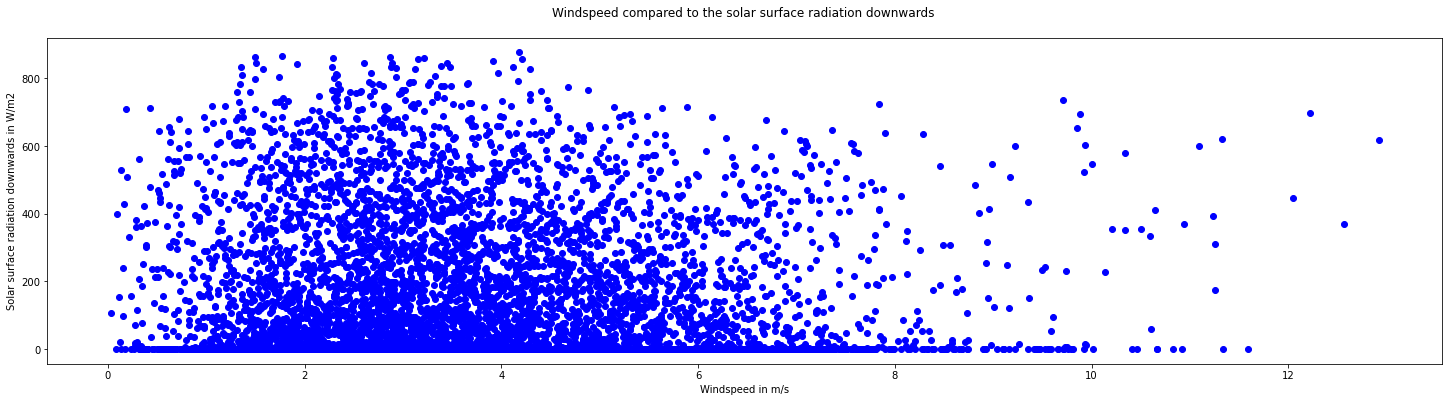

In [21]:
fig, ax = plt.subplots(figsize=(25, 6))
scatter = ax.scatter(list(postalcode["ws"]),
                list(postalcode["ssrd"]),
                color="blue")

ax.set(title="Windspeed compared to the solar surface radiation downwards \n",
      xlabel="Windspeed in m/s",
      ylabel="Solar surface radiation downwards in W/m2");

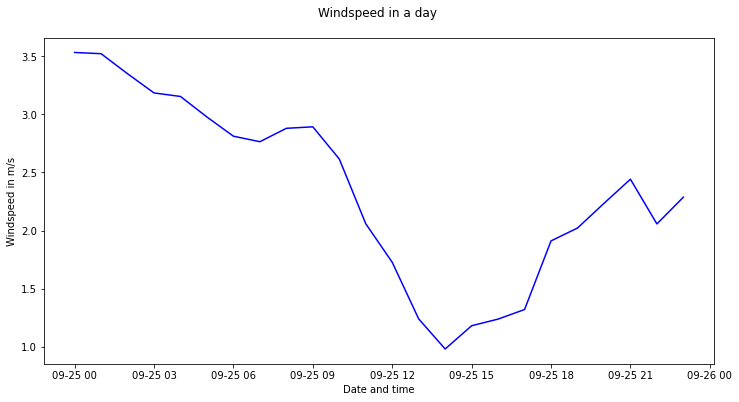

In [17]:
one_day = postalcode[postalcode['date']. dt. strftime('%Y-%m-%d')=='2021-09-25']

fig, ax = plt.subplots(figsize=(12, 6))
plot = ax.plot(list(one_day["date"]),
                list(one_day["ws"]),
                color="blue")

ax.set(title="Windspeed in a day \n",
      xlabel="Date and time",
      ylabel="Windspeed in m/s");


<h4>Merge datasets of meteo and air pollution<h4>

In [19]:
df_meteo_air_pollution = pd.merge(df_meteo, df_air_pollution[['PC4','date', 'pm10', 'pm2.5', 'no2',	'no', 'so2']], on=['PC4', 'date'])
df_meteo_air_pollution.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
43609,2021-12-05 00:00:00,5633,237.688080,4.976539,555.970093,0.955909,0.000000,15.410522,20.546804,10.439868,0.029934,2.103915
24477,2021-11-13 21:00:00,5624,88.821220,2.045222,96.590157,0.339523,0.000000,24.228361,19.232290,41.261021,26.995242,2.351892
12619,2021-11-04 19:00:00,5616,160.796585,1.727953,53.387035,0.522812,0.000000,27.238670,20.536478,49.880091,32.634315,3.407804
26558,2021-11-03 14:00:00,5625,103.965195,2.262634,305.503784,1.000000,119.495382,22.957001,18.115553,39.471337,25.824332,2.860355
58424,2021-10-04 08:00:00,5651,263.920013,4.968079,629.612366,0.677858,171.978698,10.441845,4.293599,22.359793,14.629014,2.263472
33839,2021-11-15 23:00:00,5628,50.520126,1.725624,314.104156,0.995079,0.000000,20.149544,10.624365,30.325793,19.840812,5.149575
63453,2021-10-19 21:00:00,5653,241.597977,6.111557,688.660461,0.371676,0.000000,8.283145,4.869854,10.092271,6.602922,5.725731
19944,2021-11-19 00:00:00,5622,211.617996,4.438875,417.980011,1.000000,0.000000,15.250455,10.744991,32.414140,21.207123,5.871904
70974,2021-11-11 06:00:00,5656,251.071945,1.681859,54.900814,0.974036,0.000000,42.853161,28.743258,27.750941,18.156201,6.166467
41036,2021-11-24 20:00:00,5632,313.588959,1.955194,86.385712,0.451565,0.000000,32.914658,17.704620,67.506827,44.166700,6.193094


<h4>Look for corrolations between meteo data and air pollution data<h4>

In [11]:
df_meteo_air_pollution.corr(method='spearman')

,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
PC4,1.000000,-0.000203,-0.001175,-0.000395,-0.000085,0.000106,-0.026865,-0.028674,-0.034462,-0.027125,0.004346
wd,-0.000203,1.000000,0.190082,0.048322,0.050032,0.032333,-0.148475,-0.106274,-0.161741,-0.109364,-0.008121
ws,-0.001175,0.190082,1.000000,0.807271,0.176822,0.073962,-0.607904,-0.472557,-0.591700,-0.499212,-0.212465
blh,-0.000395,0.048322,0.807271,1.000000,0.200182,0.341155,-0.615602,-0.542800,-0.655762,-0.502562,-0.337730
tcc,-0.000085,0.050032,0.176822,0.200182,1.000000,0.001251,-0.031441,0.110042,-0.105527,-0.186421,-0.208994
ssrd,0.000106,0.032333,0.073962,0.341155,0.001251,1.000000,-0.059004,-0.158170,-0.206825,-0.049303,-0.076840
pm10,-0.026865,-0.148475,-0.607904,-0.615602,-0.031441,-0.059004,1.000000,0.886844,0.560476,0.283385,0.336788
pm2.5,-0.028674,-0.106274,-0.472557,-0.542800,0.110042,-0.158170,0.886844,1.000000,0.431592,0.014917,0.189855
no2,-0.034462,-0.161741,-0.591700,-0.655762,-0.105527,-0.206825,0.560476,0.431592,1.000000,0.735620,0.394545
no,-0.027125,-0.109364,-0.499212,-0.502562,-0.186421,-0.049303,0.283385,0.014917,0.735620,1.000000,0.371746


-0.4220468437258586


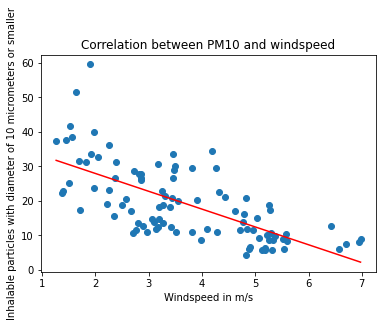

In [20]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm10_corr = group_by_day["ws"].corr(group_by_day["pm2.5"])
print(ws_pm10_corr)
plt.scatter(group_by_day["ws"], group_by_day["pm10"])
plt.plot(np.unique(group_by_day["ws"]), np.poly1d(np.polyfit(group_by_day["ws"], group_by_day["pm10"], 1))
         (np.unique(group_by_day["ws"])), color='red')
plt.title('Correlation between PM10 and windspeed')
plt.xlabel('Windspeed in m/s')
plt.ylabel('Inhalable particles with diameter of 10 micrometers or smaller');
#particulate matter <10um in ug/m3

<h2><font color=slateblue> 5. Data Preparation </font></h2>

<h2><font color=slateblue> 6. Modelling </font></h2>